# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Aliyah Fajriyani
- **Email:** naliyahnajaemin2@gmail.com
- **ID Dicoding:** liyahfjr

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh peningkatan suhu terhadap jumlah peminjaman sepeda dalam 6 bulan terakhir?
- Bagaimana perbandingan persentase peningkatan peminjaman sepeda antara hari kerja dan hari libur dalam satu tahun terakhir?
- Bagaimana hubungan antara kecepatan angin dan jumlah peminjaman sepeda pada jam-jam sibuk di hari kerja?
- Berapa persentase peminjaman sepeda di berbagai musim pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tidak terdapat missing value, namun ada kesalahan tipe data untuk kolom dteday yang dimana sebelumnya tipe datanya merupakan object. Setelah dilakukan pembersihan data maka berubah menjadi date.

In [23]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Tidak terdapat duplicate data, sehingga tidak diperlukan pembersihan data.

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Sama seperti pada day.csv tidak terdapat missing value, namun ada kesalahan tipe data untuk kolom dteday yang dimana sebelumnya tipe datanya merupakan object. Setelah dilakukan pembersihan data maka berubah menjadi date.

In [25]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Tidak terdapat duplicate data, sehingga tidak diperlukan pembersihan data.

### Cleaning Data

In [26]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])
    
day_df.info()
print(" ")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [28]:
day_df.groupby('weekday')['cnt'].agg('sum').reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


### Explorasi Data hour_df

In [29]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
hour_df.groupby('hr').agg({'registered': 'sum', 'casual': 'sum'}).reset_index()

,hr,registered,casual
0,0,31755,7375
1,1,19455,4709
2,2,12940,3412
3,3,6281,1893
4,4,3554,874
5,5,13249,1012
6,6,52115,3017
7,7,146134,8037
8,8,245240,15761
9,9,136980,22458


### Eksplorasi Data day_df dan hour_df

In [31]:
day_hour_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
day_hour_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [32]:
season_labels = {
    1: 'Winter',
    2: 'Summer',
    3: 'Spring',
    4: 'Fall'
}

day_hour_df['seasons'] = day_hour_df['season_day'].map(season_labels)

In [33]:
day_hour_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,seasons
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [34]:
day_hour_df.groupby('seasons').agg({'cnt_hour': 'sum', 'cnt_day': 'sum'}).reset_index()

,seasons,cnt_hour,cnt_day
0,Fall,841613,20167029
1,Spring,1061129,25420803
2,Summer,918589,22024071
3,Winter,471348,11179147


## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Bagaimana pengaruh peningkatan suhu terhadap jumlah peminjaman sepeda dalam 6 bulan terakhir?

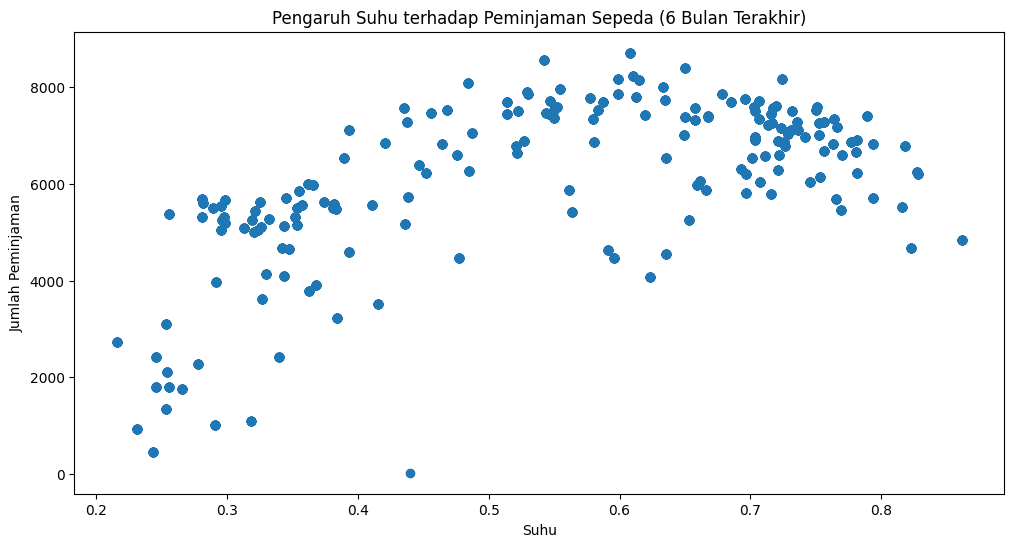

In [35]:
six_months_ago = day_hour_df['dteday'].max() - pd.DateOffset(months=6)
recent_data = day_hour_df[day_hour_df['dteday'] >= six_months_ago]

plt.figure(figsize=(12, 6))
plt.scatter(recent_data['temp_day'], recent_data['cnt_day'])
plt.title('Pengaruh Suhu terhadap Peminjaman Sepeda (6 Bulan Terakhir)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 2:

#### Bagaimana perbandingan persentase peningkatan peminjaman sepeda antara hari kerja dan hari libur dalam satu tahun terakhir?

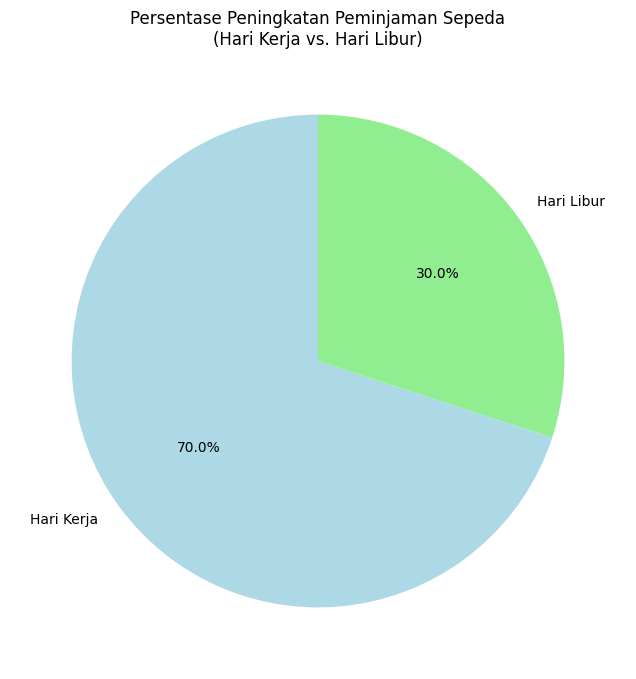

In [36]:
one_year_ago = day_hour_df['dteday'].max() - pd.DateOffset(years=1)
last_year_data = day_hour_df[day_hour_df['dteday'] >= one_year_ago]

weekday_counts = last_year_data.groupby('workingday_day')['cnt_day'].sum()

percentage_increase = ((weekday_counts[1] - weekday_counts[0]) / weekday_counts[0]) * 100

labels = ['Hari Kerja', 'Hari Libur']
sizes = [weekday_counts[1], weekday_counts[0]]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Persentase Peningkatan Peminjaman Sepeda\n(Hari Kerja vs. Hari Libur)')
plt.show()

## Pertanyaan 3:

### Bagaimana hubungan antara kecepatan angin dan jumlah peminjaman sepeda pada jam-jam sibuk di hari kerja?

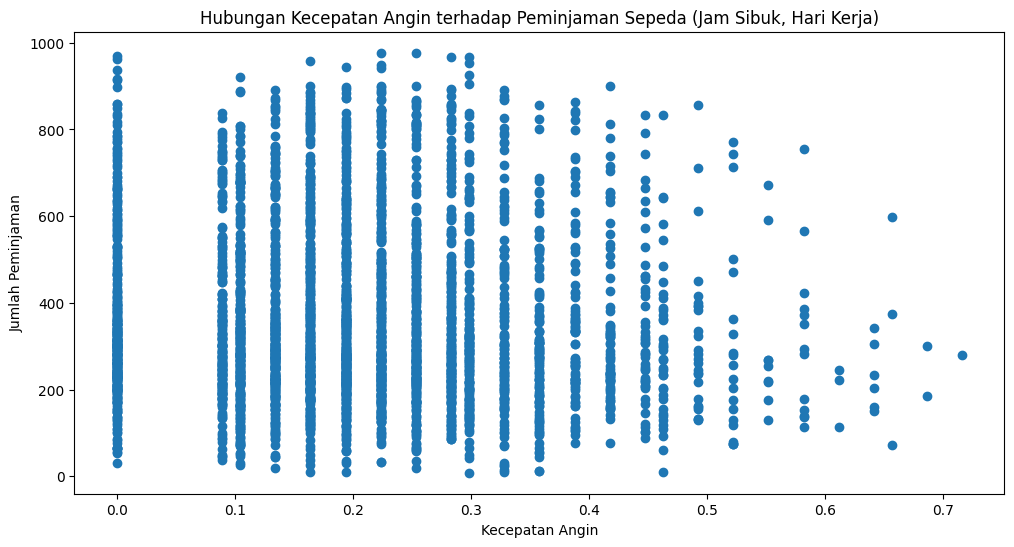

In [37]:
busy_hours_data = last_year_data[(last_year_data['hr'] >= 7) & (last_year_data['hr'] <= 19) & (last_year_data['workingday_day'] == 1)]

plt.figure(figsize=(12, 6))
plt.scatter(busy_hours_data['windspeed_hour'], busy_hours_data['cnt_hour'])
plt.title('Hubungan Kecepatan Angin terhadap Peminjaman Sepeda (Jam Sibuk, Hari Kerja)')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Pertanyaan 4:

### Berapa persentase peminjaman sepeda di berbagai musim pada hari kerja?

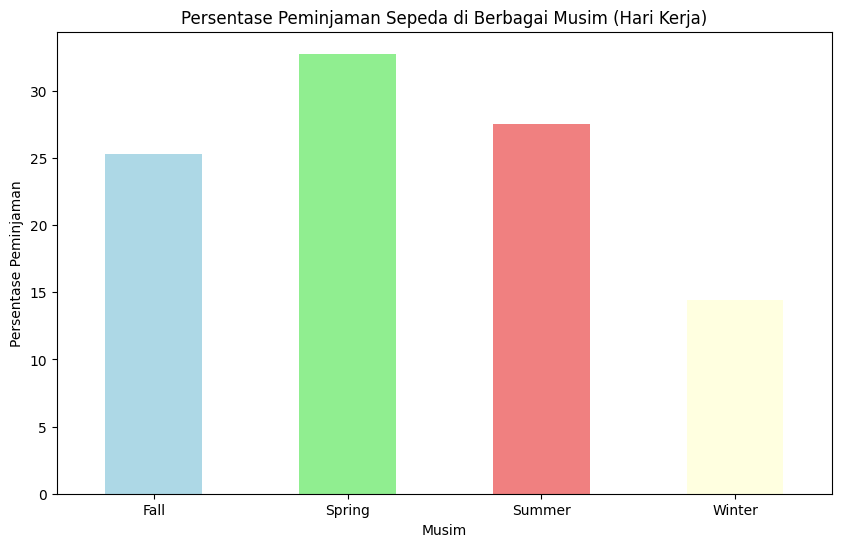

In [38]:
season_workday_counts = day_hour_df[day_hour_df['workingday_day'] == 1].groupby('seasons')['cnt_day'].sum()

total_workday_counts = season_workday_counts.sum()

percentage_by_season = (season_workday_counts / total_workday_counts) * 100

plt.figure(figsize=(10, 6))
percentage_by_season.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Persentase Peminjaman Sepeda di Berbagai Musim (Hari Kerja)')
plt.xlabel('Musim')
plt.ylabel('Persentase Peminjaman')
plt.xticks(rotation=0)
plt.show()


## Conclusion

- Conclution pertanyaan 1:
  Berdasarkan analisis pengaruh suhu terhadap jumlah peminjaman sepeda selama 6 bulan terakhir, terlihat bahwa terdapat korelasi antara suhu dan aktivitas peminjaman sepeda. Scatter plot menunjukkan tren bahwa pada rentang suhu tertentu, terutama pada suhu yang lebih hangat, terjadi peningkatan jumlah peminjaman sepeda. Pola ini memberikan indikasi bahwa suhu memiliki dampak signifikan terhadap minat masyarakat untuk menggunakan sepeda, dengan puncak aktivitas terlihat pada suhu yang nyaman, terutama pada pagi dan sore hari.
  
- Conclution pertanyaan 2:
  Berdasarkan analisis jumlah peminjaman sepeda pada periode satu tahun terakhir, terlihat bahwa terdapat peningkatan signifikan pada jumlah peminjaman pada hari kerja dibandingkan dengan hari libur. Persentase peningkatan ini mencerminkan preferensi masyarakat untuk menggunakan sepeda lebih banyak pada saat-saat kerja. Visualisasi dengan diagram lingkaran memperkuat perbandingan antara jumlah peminjaman pada hari kerja dan hari libur, dengan jelas menunjukkan dominasi peminjaman sepeda pada hari kerja sebesar 70%.

- Conclution pertanyaan 3:
  Berdasarkan analisis hubungan antara kecepatan angin dan jumlah peminjaman sepeda pada jam sibuk hari kerja, dapat disimpulkan bahwa tidak terlihat adanya pola atau korelasi yang signifikan antara kedua variabel tersebut. Scatter plot menunjukkan distribusi data yang merata dan tidak menunjukkan tren tertentu, mengindikasikan bahwa kecepatan angin mungkin tidak memiliki pengaruh yang kuat terhadap jumlah peminjaman sepeda pada jam-jam sibuk. I ini memberikan gambaran bahwa kecepatan angin pada jam-jam sibuk hari kerja mungkin bukan faktor utama yang memengaruhi tingkat peminjaman sepeda.

- Conclution pertanyaan 4:
Berdasarkan analisis persentase peminjaman sepeda di berbagai musim selama hari kerja, dapat dilihat bahwa musim dengan warna lightyellow yang merupakan musim dingin menunjukkan fluktuasi yang signifikan dalam jumlah peminjaman sepeda. Fluktuasi ini mungkin disebabkan oleh kondisi cuaca yang berubah-ubah dan suhu yang cenderung lebih rendah selama musim dingin. Di sisi lain, musim lainnya, seperti yang ditandai dengan warna lightgreen, lightcoral, dan lightblue, menunjukkan kestabilan dalam pola peminjaman sepeda. Dimana musim semi memiliki presentase paling tinggi dalam peminjaman sepeda.  